<h1 align="center"><b>Data preprocessing</b></h1> 

## Data transformation

## iris dataset

<img src="http://www.snrazavi.ir/imgs/iris.png" width="70%">

In [1]:
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=0)


In [3]:
print("mean :               %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean :               [5.88660714 3.05178571 3.79642857 1.22232143] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77916047] 


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled  = scaler.transform(X_test)

first = iris.data[0]
first_scaled = scaler.transform(iris.data[0:1]).round(1)[0]
first_rescaled =  scaler.inverse_transform(first_scaled).round(1)
print("First sample before  transforming : ", first)
print("First sample after   transforming : ", first_scaled)
print("First sample inverse transforming : ", first_rescaled)

First sample before  transforming :  [5.1 3.5 1.4 0.2]
First sample after   transforming :  [-0.9  1.  -1.3 -1.3]
First sample inverse transforming :  [5.1 3.5 1.5 0.2]


In [5]:
print("mean :               %s " % X_train_scaled.mean(axis=0).round(8))
print("standard deviation : %s " % X_train_scaled.std(axis=0).round(8))

mean :               [ 0. -0.  0.  0.] 
standard deviation : [1. 1. 1. 1.] 


In [6]:
from sklearn.neural_network import MLPClassifier

kwargs = dict(hidden_layer_sizes=(5, 3, 2), activation = 'relu', max_iter = 500, random_state=1)


# classify iris without normalization
clf = MLPClassifier(**kwargs).fit(X_train,y_train)
without_normalization = clf.score(X_test,y_test)



# classify iris after normalization
clf = MLPClassifier(**kwargs).fit(X_train_scaled,y_train)
with_normalization = clf.score(X_test_scaled,y_test)



print('Accuracy before normalization: {:2d}%'.format(int(without_normalization*100)))
print('Accuracy after  normalization: {:2d}%'.format(int(with_normalization*100)))

Accuracy before normalization: 26%
Accuracy after  normalization: 97%


## Data reduction

### digits dataset

<img src='http://www.snrazavi.ir/imgs/digits.png' width='50%'/>

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
%matplotlib inline

digits = load_digits()

X, y= digits.data, digits.target

Dataset dimention before PCA:  64
Dataset dimention after  PCA:  41


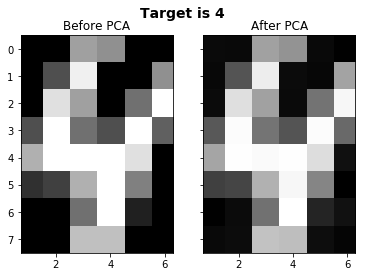

In [8]:
from sklearn.decomposition import PCA

img_num = np.random.randint(0,X.shape[0])

pca = PCA(0.99, random_state=0)
pca.fit(X)
X_pca = pca.transform(X)

tmp = X[img_num].reshape(8,8)
tmp_inv = pca.inverse_transform(X_pca[img_num]).reshape(8,8)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.suptitle('Target is %s' % (y[img_num]), fontsize=14, fontweight='bold')
ax1.imshow(tmp,cmap='gray')
ax2.imshow(tmp_inv,cmap='gray')
ax1.set_title('Before PCA')
ax2.set_title('After PCA')
print("Dataset dimention before PCA: ", X.shape[1])
print("Dataset dimention after  PCA: ", X_pca.shape[1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.25, random_state=0)

In [10]:
import time
from sklearn.neural_network import MLPClassifier

kwargs = dict(hidden_layer_sizes=(30, 25,20, 20, 10), activation = 'relu', max_iter = 150, random_state=1)

# 

# classify digits without pca
tic1 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
without_pca = clf.score(X_test, y_test)
toc1 = time.time()

time.sleep(.2)

# classify digits after pca
tic2 = time.time()
clf = MLPClassifier(**kwargs).fit(X_train_pca, y_train_pca)
with_pca = clf.score(X_test_pca, y_test_pca)
toc2 = time.time()



print('Accuracy before PCA: {:2d}% in {:.2f}s'.format(int(without_pca*100),toc1-tic1))
print('Accuracy after  PCA: {:2d}% in {:.2f}s'.format(int(with_pca*100),toc2-tic2))

Accuracy before PCA: 93% in 2.84s
Accuracy after  PCA: 95% in 1.32s


# Combining Normalization and PCA

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()
X,y = digits.data,digits.target

X = MinMaxScaler().fit_transform(X)

X = PCA(0.99, random_state=0).fit_transform(X)

print('New dimension after PCA is %s' % X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=0)

clf = MLPClassifier(hidden_layer_sizes=(30, 25, 15, 10), activation = 'tanh', max_iter = 500, random_state=1).fit(X_train, y_train)

score = clf.score(X_test, y_test)

print('Classification score after normalization and PCA is %.4f' %score)

New dimension after PCA is 44
Classification score after normalization and PCA is 0.9711


# Data Cleaning

## internet advertisements

In [12]:
import pandas as pd
import numpy as np
data =  pd.read_csv('add.csv')
data = data.replace(r'^\s*\?\s*$', np.nan,regex=True)
data.head(11)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,0,125,125,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,1,57,468,8.2105,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,2,33,230,6.9696,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,3,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,4,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,5,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,6,59,460,7.7966,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,7,60,234,3.9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,8,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,9,60,468,7.8,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [13]:
data.iloc[:,1:4].isnull().sum()

0    903
1    901
2    910
dtype: int64

In [14]:
import copy 
from sklearn.preprocessing import LabelBinarizer,StandardScaler

# data.dropna(inplace=True)

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]

y = LabelBinarizer().fit_transform(y)

X.iloc[:,:3] = X.iloc[:,:3].astype(float)
X.iloc[:,3:] = X.iloc[:,3:].astype(bool)
X.iloc[:,:3] = X.iloc[:,:3].replace(np.NaN,X.iloc[:,:3].mean())



X.iloc[:,:3] = StandardScaler().fit_transform(X.iloc[:,:3])
X_new = PCA(0.98, random_state=0).fit_transform(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557
0,1.305837,-0.274088,-0.567039,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.150373,2.824037,0.837047,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,-0.664329,0.674318,0.595409,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-0.086128,2.824037,0.757111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.086128,2.824037,0.757111,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
print('dimension before PCA is %s and after PCA is %s' % (X.shape[1],X_new.shape[1]))

kwargs = dict(hidden_layer_sizes=(100,50,25,5), activation = 'relu', max_iter = 200, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y, random_state=0)
tic = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
score = clf.score(X_test, y_test)
toc = time.time()
print('Classification score before normalization and PCA is {:.2f}% in {:.2f} seconds'.format(round(score*100,2),toc-tic))


X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25,stratify=y, random_state=0)
tic = time.time()
clf = MLPClassifier(**kwargs).fit(X_train, y_train)
score = clf.score(X_test, y_test)
toc = time.time()

print('Classification score after  normalization and PCA is {:.2f}% in {:.2f} seconds'.format(round(score*100,2),toc-tic))


dimension before PCA is 1558 and after PCA is 349
Classification score before normalization and PCA is 97.32% in 4.89 seconds
Classification score after  normalization and PCA is 97.68% in 2.72 seconds
